# Surveillance Firefighter YoloV8 ESP32

* Fire and smoke dataset https://universe.roboflow.com/veli-t/firesmokedetection-5w49j/dataset/3
* YoloV8 documentation https://docs.ultralytics.com/models/yolov8/
* Trained Model https://www.kaggle.com/models/bahiskaraananda/sfy8-32

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [2]:
# Install necessary packages
!pip install ultralytics==8.0.196
from IPython import display
display.clear_output()

In [3]:
# Import Ultralytics and check
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6277.9/8062.4 GB disk)


In [11]:
from ultralytics import YOLO
from IPython.display import display, Image
from pathlib import Path

In [12]:
# Import Roboflow (adjust API key)
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("roboflow_key")

In [13]:
!pip install roboflow
from roboflow import Roboflow

In [14]:
# Define Roboflow Project and Dataset
rf = Roboflow(api_key=secret_value_0)
project = rf.workspace("veli-t").project("firesmokedetection-5w49j")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [15]:
data_yaml_path = f"{dataset.location}/data.yaml"
print(data_yaml_path)

/kaggle/working/FireSmokeDetection-3/data.yaml


In [22]:
with open(data_yaml_path, "r") as file:
    print(file.read())


train: /kaggle/working/FireSmokeDetection-3/train/images
val: /kaggle/working/FireSmokeDetection-3/valid/images
test: /kaggle/working/FireSmokeDetection-3/test/images

nc: 82
names:
  0: person
  1: bicycle
  2: car
  3: motorcycle
  4: airplane
  5: bus
  6: train
  7: truck
  8: boat
  9: traffic light
  10: fire hydrant
  11: stop sign
  12: parking meter
  13: bench
  14: bird
  15: cat
  16: dog
  17: horse
  18: sheep
  19: cow
  20: elephant
  21: bear
  22: zebra
  23: giraffe
  24: backpack
  25: umbrella
  26: handbag
  27: tie
  28: suitcase
  29: frisbee
  30: skis
  31: snowboard
  32: sports ball
  33: kite
  34: baseball bat
  35: baseball glove
  36: skateboard
  37: surfboard
  38: tennis racket
  39: bottle
  40: wine glass
  41: cup
  42: fork
  43: knife
  44: spoon
  45: bowl
  46: banana
  47: apple
  48: sandwich
  49: orange
  50: broccoli
  51: carrot
  52: hot dog
  53: pizza
  54: donut
  55: cake
  56: chair
  57: couch
  58: potted plant
  59: bed
  60: di

In [23]:
# Rewrite the YAML file
custom_yaml = f"""
train: {dataset.location}/train/images
val: {dataset.location}/valid/images
test: {dataset.location}/test/images

nc: 82
names:
"""

# Add 80 COCO class names (hardcoded)
coco_classes = [
  'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
  'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat',
  'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella',
  'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
  'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork',
  'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog',
  'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv',
  'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink',
  'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Append the classes
for i, cls in enumerate(coco_classes):
    custom_yaml += f"  {i}: {cls}\n"

# Add fire and smoke
custom_yaml += "  80: fire\n"
custom_yaml += "  81: smoke\n"

# Save the updated YAML
with open(data_yaml_path, "w") as f:
    f.write(custom_yaml)

In [24]:
with open(data_yaml_path, "r") as file:
    print(file.read())


train: /kaggle/working/FireSmokeDetection-3/train/images
val: /kaggle/working/FireSmokeDetection-3/valid/images
test: /kaggle/working/FireSmokeDetection-3/test/images

nc: 82
names:
  0: person
  1: bicycle
  2: car
  3: motorcycle
  4: airplane
  5: bus
  6: train
  7: truck
  8: boat
  9: traffic light
  10: fire hydrant
  11: stop sign
  12: parking meter
  13: bench
  14: bird
  15: cat
  16: dog
  17: horse
  18: sheep
  19: cow
  20: elephant
  21: bear
  22: zebra
  23: giraffe
  24: backpack
  25: umbrella
  26: handbag
  27: tie
  28: suitcase
  29: frisbee
  30: skis
  31: snowboard
  32: sports ball
  33: kite
  34: baseball bat
  35: baseball glove
  36: skateboard
  37: surfboard
  38: tennis racket
  39: bottle
  40: wine glass
  41: cup
  42: fork
  43: knife
  44: spoon
  45: bowl
  46: banana
  47: apple
  48: sandwich
  49: orange
  50: broccoli
  51: carrot
  52: hot dog
  53: pizza
  54: donut
  55: cake
  56: chair
  57: couch
  58: potted plant
  59: bed
  60: di

In [16]:
# Define dataset directory and convert to Path object
DATASET_DIR = Path("/kaggle/working/FireSmokeDetection-3")
LABEL_DIRS = [DATASET_DIR / split / "labels" for split in ["train", "valid", "test"]]

# Print the label directories to ensure they are correct
print("Label directories detected:")
for dir in LABEL_DIRS:
    print(dir)

Label directories detected:
/kaggle/working/FireSmokeDetection-3/train/labels
/kaggle/working/FireSmokeDetection-3/valid/labels
/kaggle/working/FireSmokeDetection-3/test/labels


In [21]:
# Relabel current datasets
LABEL_MAP = {
    0: 80,  # fire/Fire → 80
    1: 80,  # fire/Fire → 80
    2: 81   # smoke → 81
}

def clean_labels(label_dir):
    """ Clean and update label files by applying LABEL_MAP """
    updated_files = []
    for label_path in label_dir.glob("*.txt"):
        new_lines = []
        with open(label_path, "r") as file:
            for line in file:
                parts = line.strip().split()
                if not parts:
                    continue
                class_id = int(parts[0])

                if class_id in LABEL_MAP:
                    parts[0] = str(LABEL_MAP[class_id])
                    new_lines.append(" ".join(parts))
                
        if new_lines:
            with open(label_path, "w") as file:
                file.write("\n".join(new_lines))
            updated_files.append(label_path)
    return updated_files

def get_file_hash(file_path):
    """ Generate hash of the file content to compare before and after """
    hash_sha256 = hashlib.sha256()
    with open(file_path, "rb") as file:
        while chunk := file.read(4096):
            hash_sha256.update(chunk)
    return hash_sha256.hexdigest()

def check_labels_update(label_dir):
    label_files = list(label_dir.glob("*.txt"))
    file_hashes_before = {file: get_file_hash(file) for file in label_files}

    updated_files = clean_labels(label_dir)
    file_hashes_after = {file: get_file_hash(file) for file in label_files}
    changed_files = [
        file for file, hash_before in file_hashes_before.items()
        if hash_before != file_hashes_after[file]
    ]
    return changed_files

for dir in LABEL_DIRS:
    changed = check_labels_update(dir)
    if changed:
        print(f"✅ The following label files were updated in {dir}:")
        for file in changed:
            print(f"   - {file.name}")
    else:
        print(f"❌ No changes detected in label files in {dir}.")

✅ The following label files were updated in /kaggle/working/FireSmokeDetection-3/train/labels:
   - MirrorWEBFire1882_jpg.rf.a378d4b0e12bdb9d452b11bea5954d99.txt
   - MirrorWEBFire1372_jpg.rf.695daa94e1f26e510a517f0dd7bcb0aa.txt
   - NoiseWEBFire1251_jpg.rf.2b6d515b58108d02d6b2393c6c1299fe.txt
   - new_fire_49_jpg.rf.d9008825dddaf1f8448510094c5e8f91.txt
   - new_fire_fire-697_png_jpg.rf.52e6f488172d6e0c382d01d53cb0991e.txt
   - MirrorWEBFire1554_jpg.rf.7c1b79fceeabd713b50a4a6fa701444a.txt
   - fire1-385-_jpg.rf.564adfe7b356d73a4f392beed94009c2.txt
   - fire1-101-_jpg.rf.cfedb64f2765690c5672e25eaf5c4484.txt
   - fire1-73-_jpg.rf.3be6f75d155e6e990848250d98bbe310.txt
   - WEBSmoke1072_jpg.rf.2b8999d280bf2a65d5b6e815f3cea203.txt
   - FireDetectionImage_NoiseWEBFire088_jpg.rf.603860e863ce93a5048525825c9a5c6b.txt
   - new_fire_fire-607_png_jpg.rf.9f2d5b6a8a498577bb1312b094350633.txt
   - fire1-513-_jpg.rf.feec931946d2aaf4d7e36ec4520c6e70.txt
   - fire1-459-_jpg.rf.466a59c3610d0e468ca004f85b5

In [25]:
# Train the model with extended head
!yolo task=detect mode=train model=yolov8s.pt data={data_yaml_path} epochs=20 imgsz=640 plots=True

New https://pypi.org/project/ultralytics/8.3.109 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/FireSmokeDetection-3/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, aug

Displaying: R_curve.png


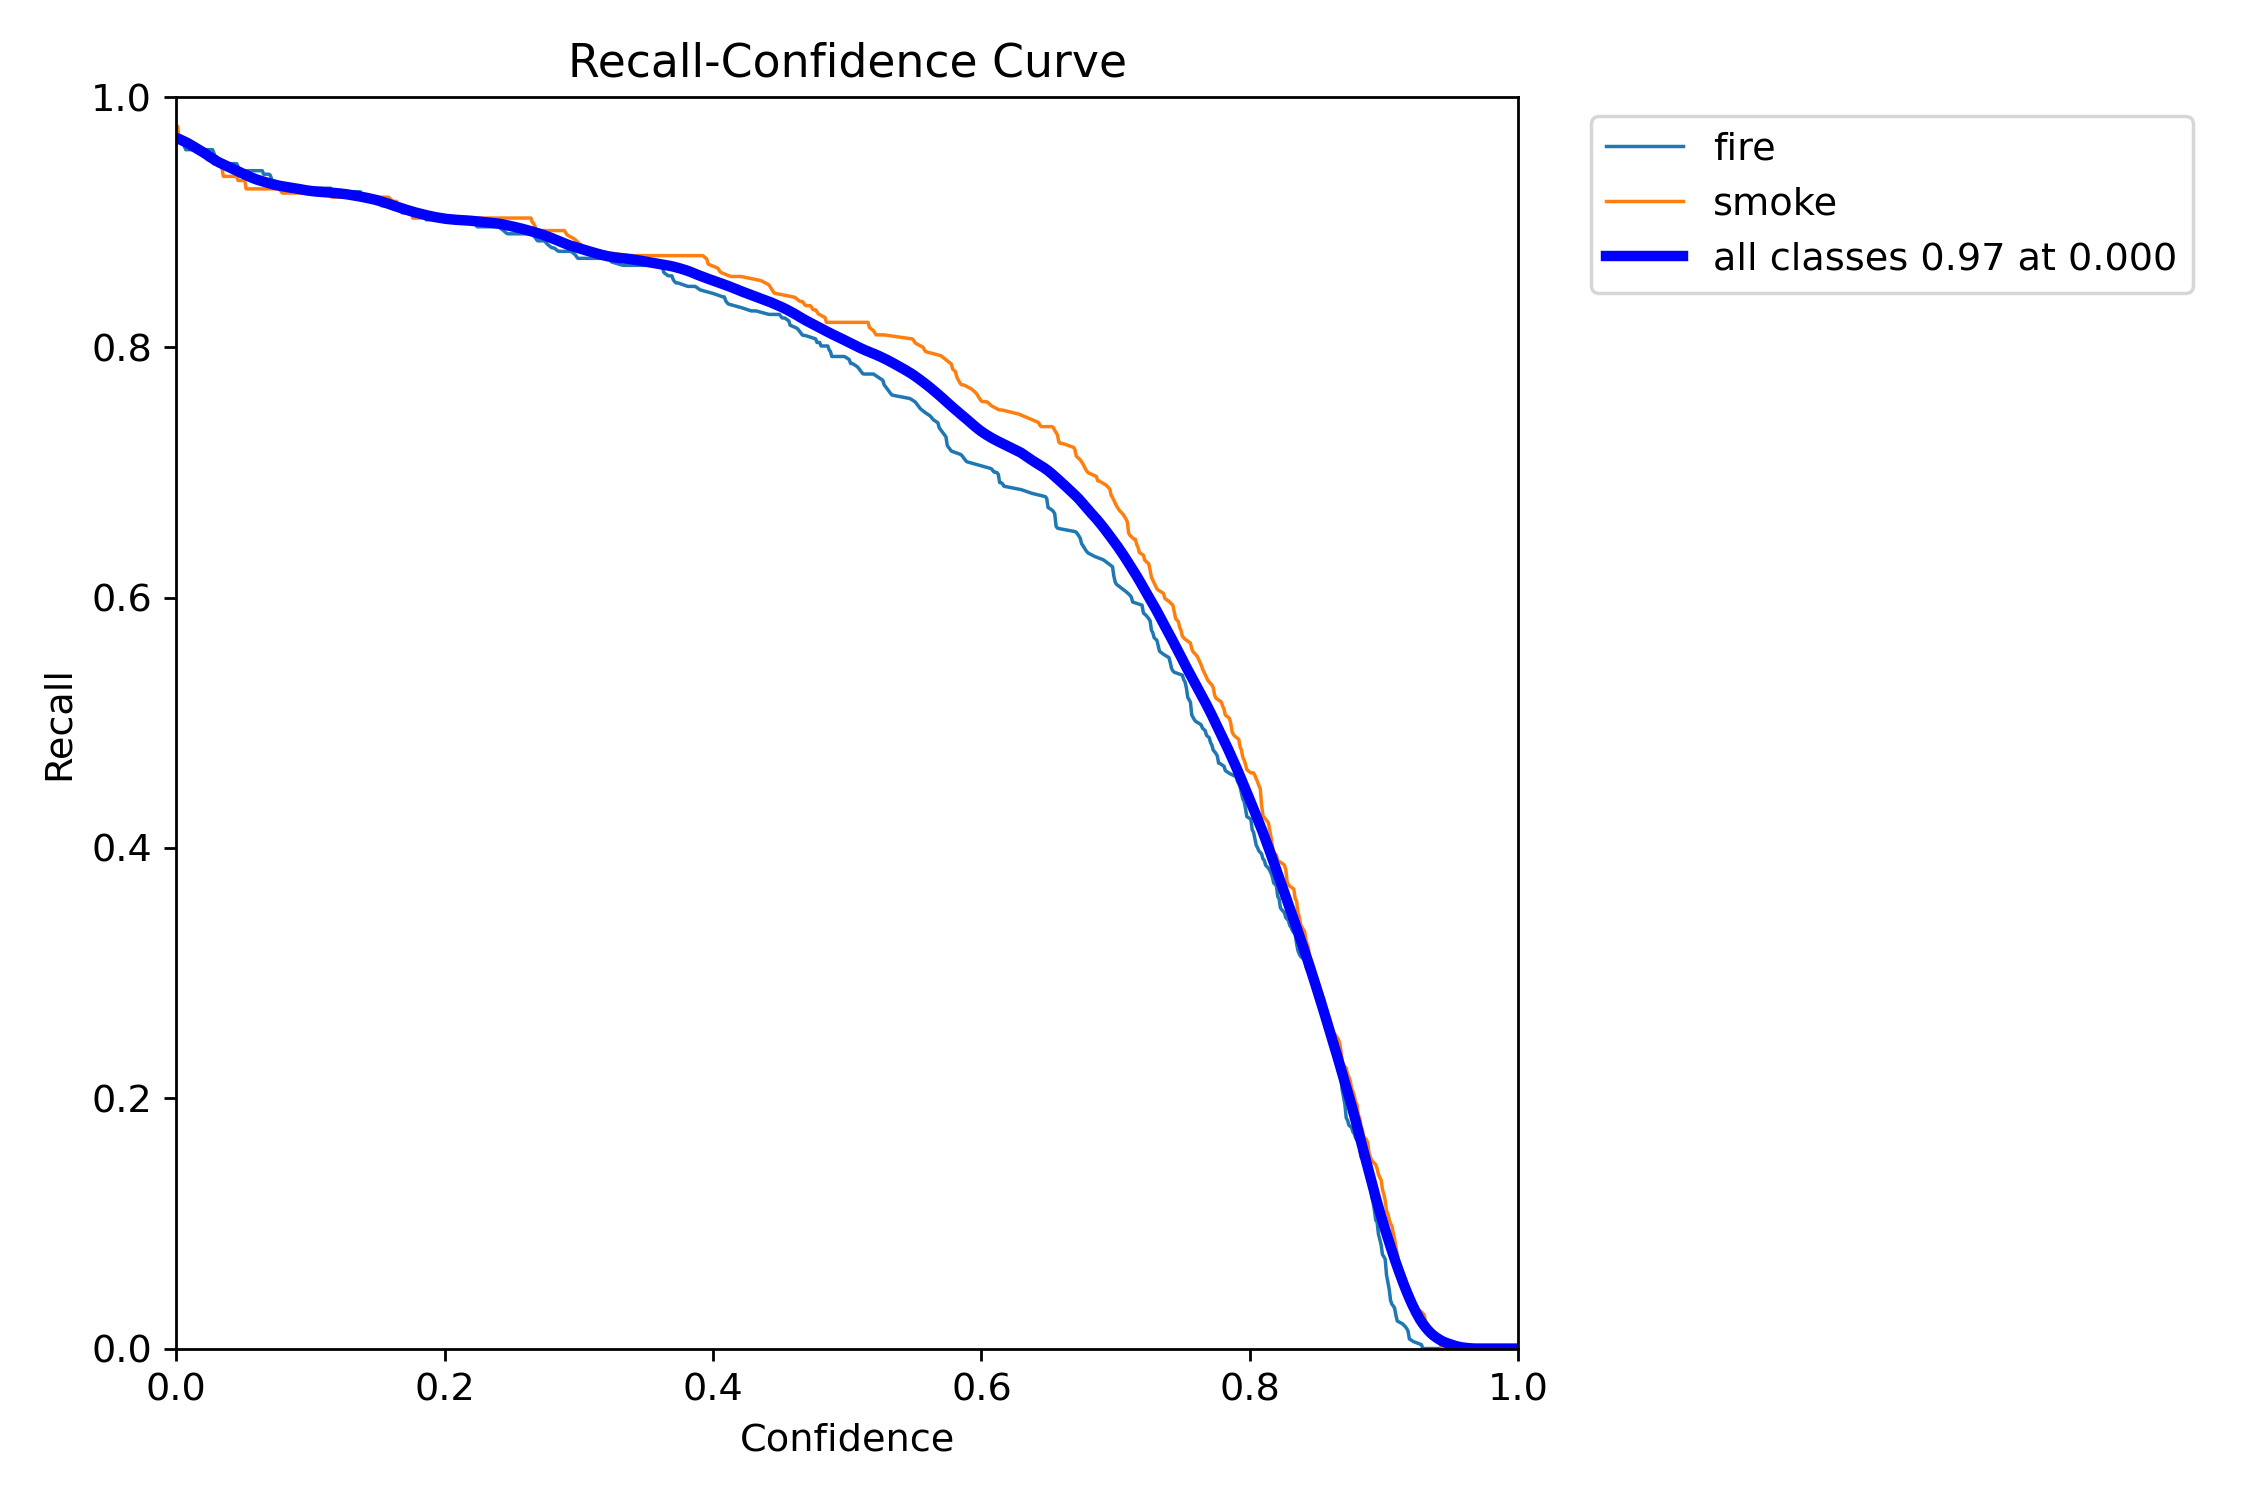

Displaying: results.png


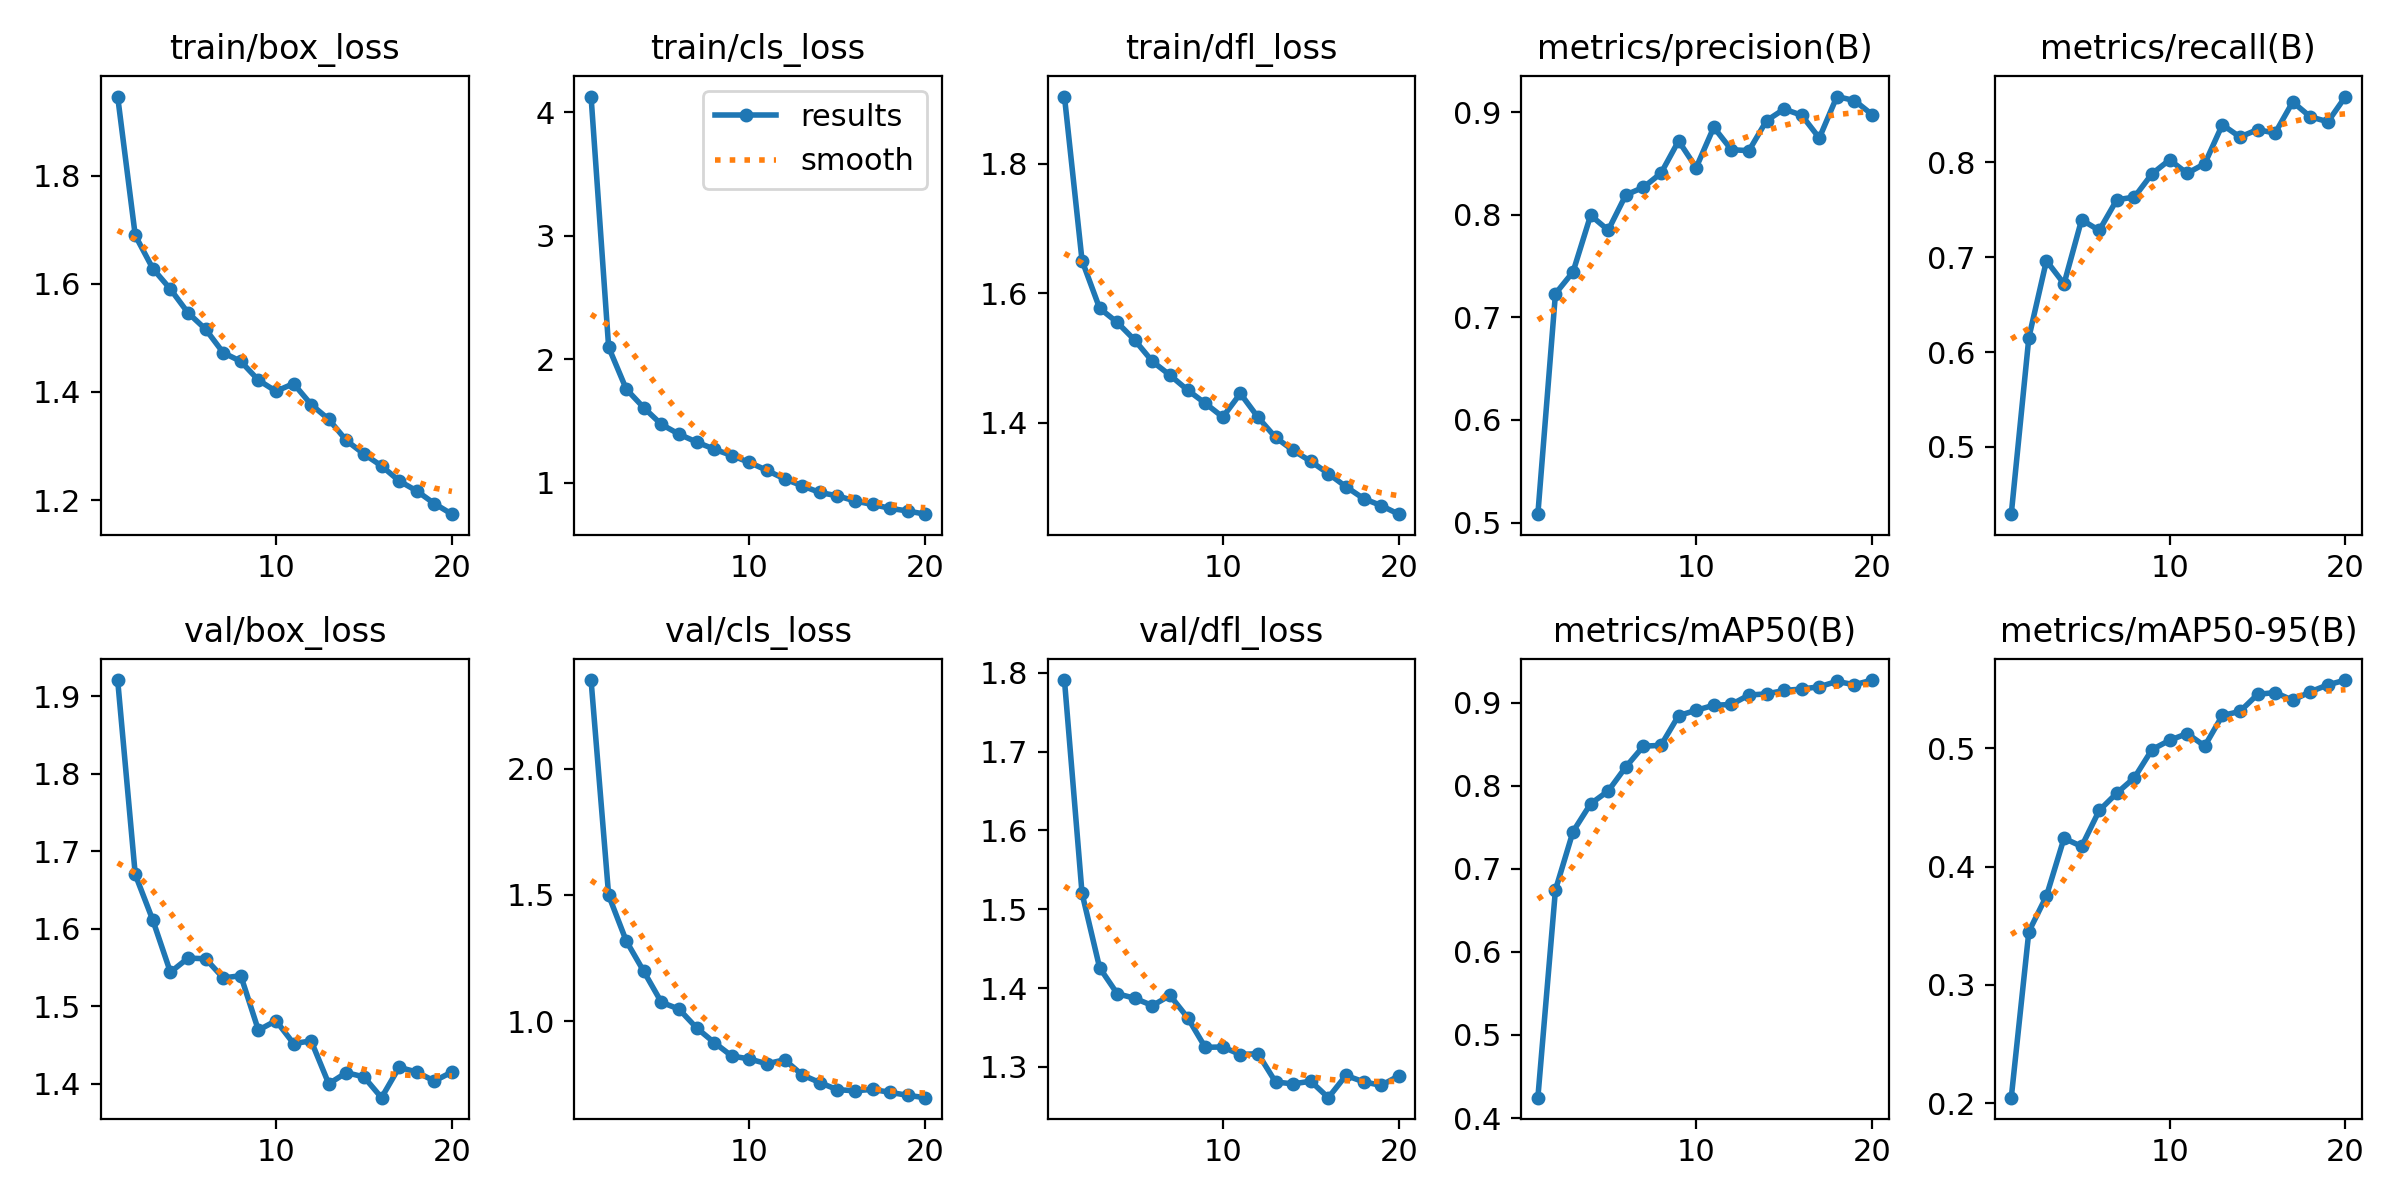

Displaying: confusion_matrix_normalized.png


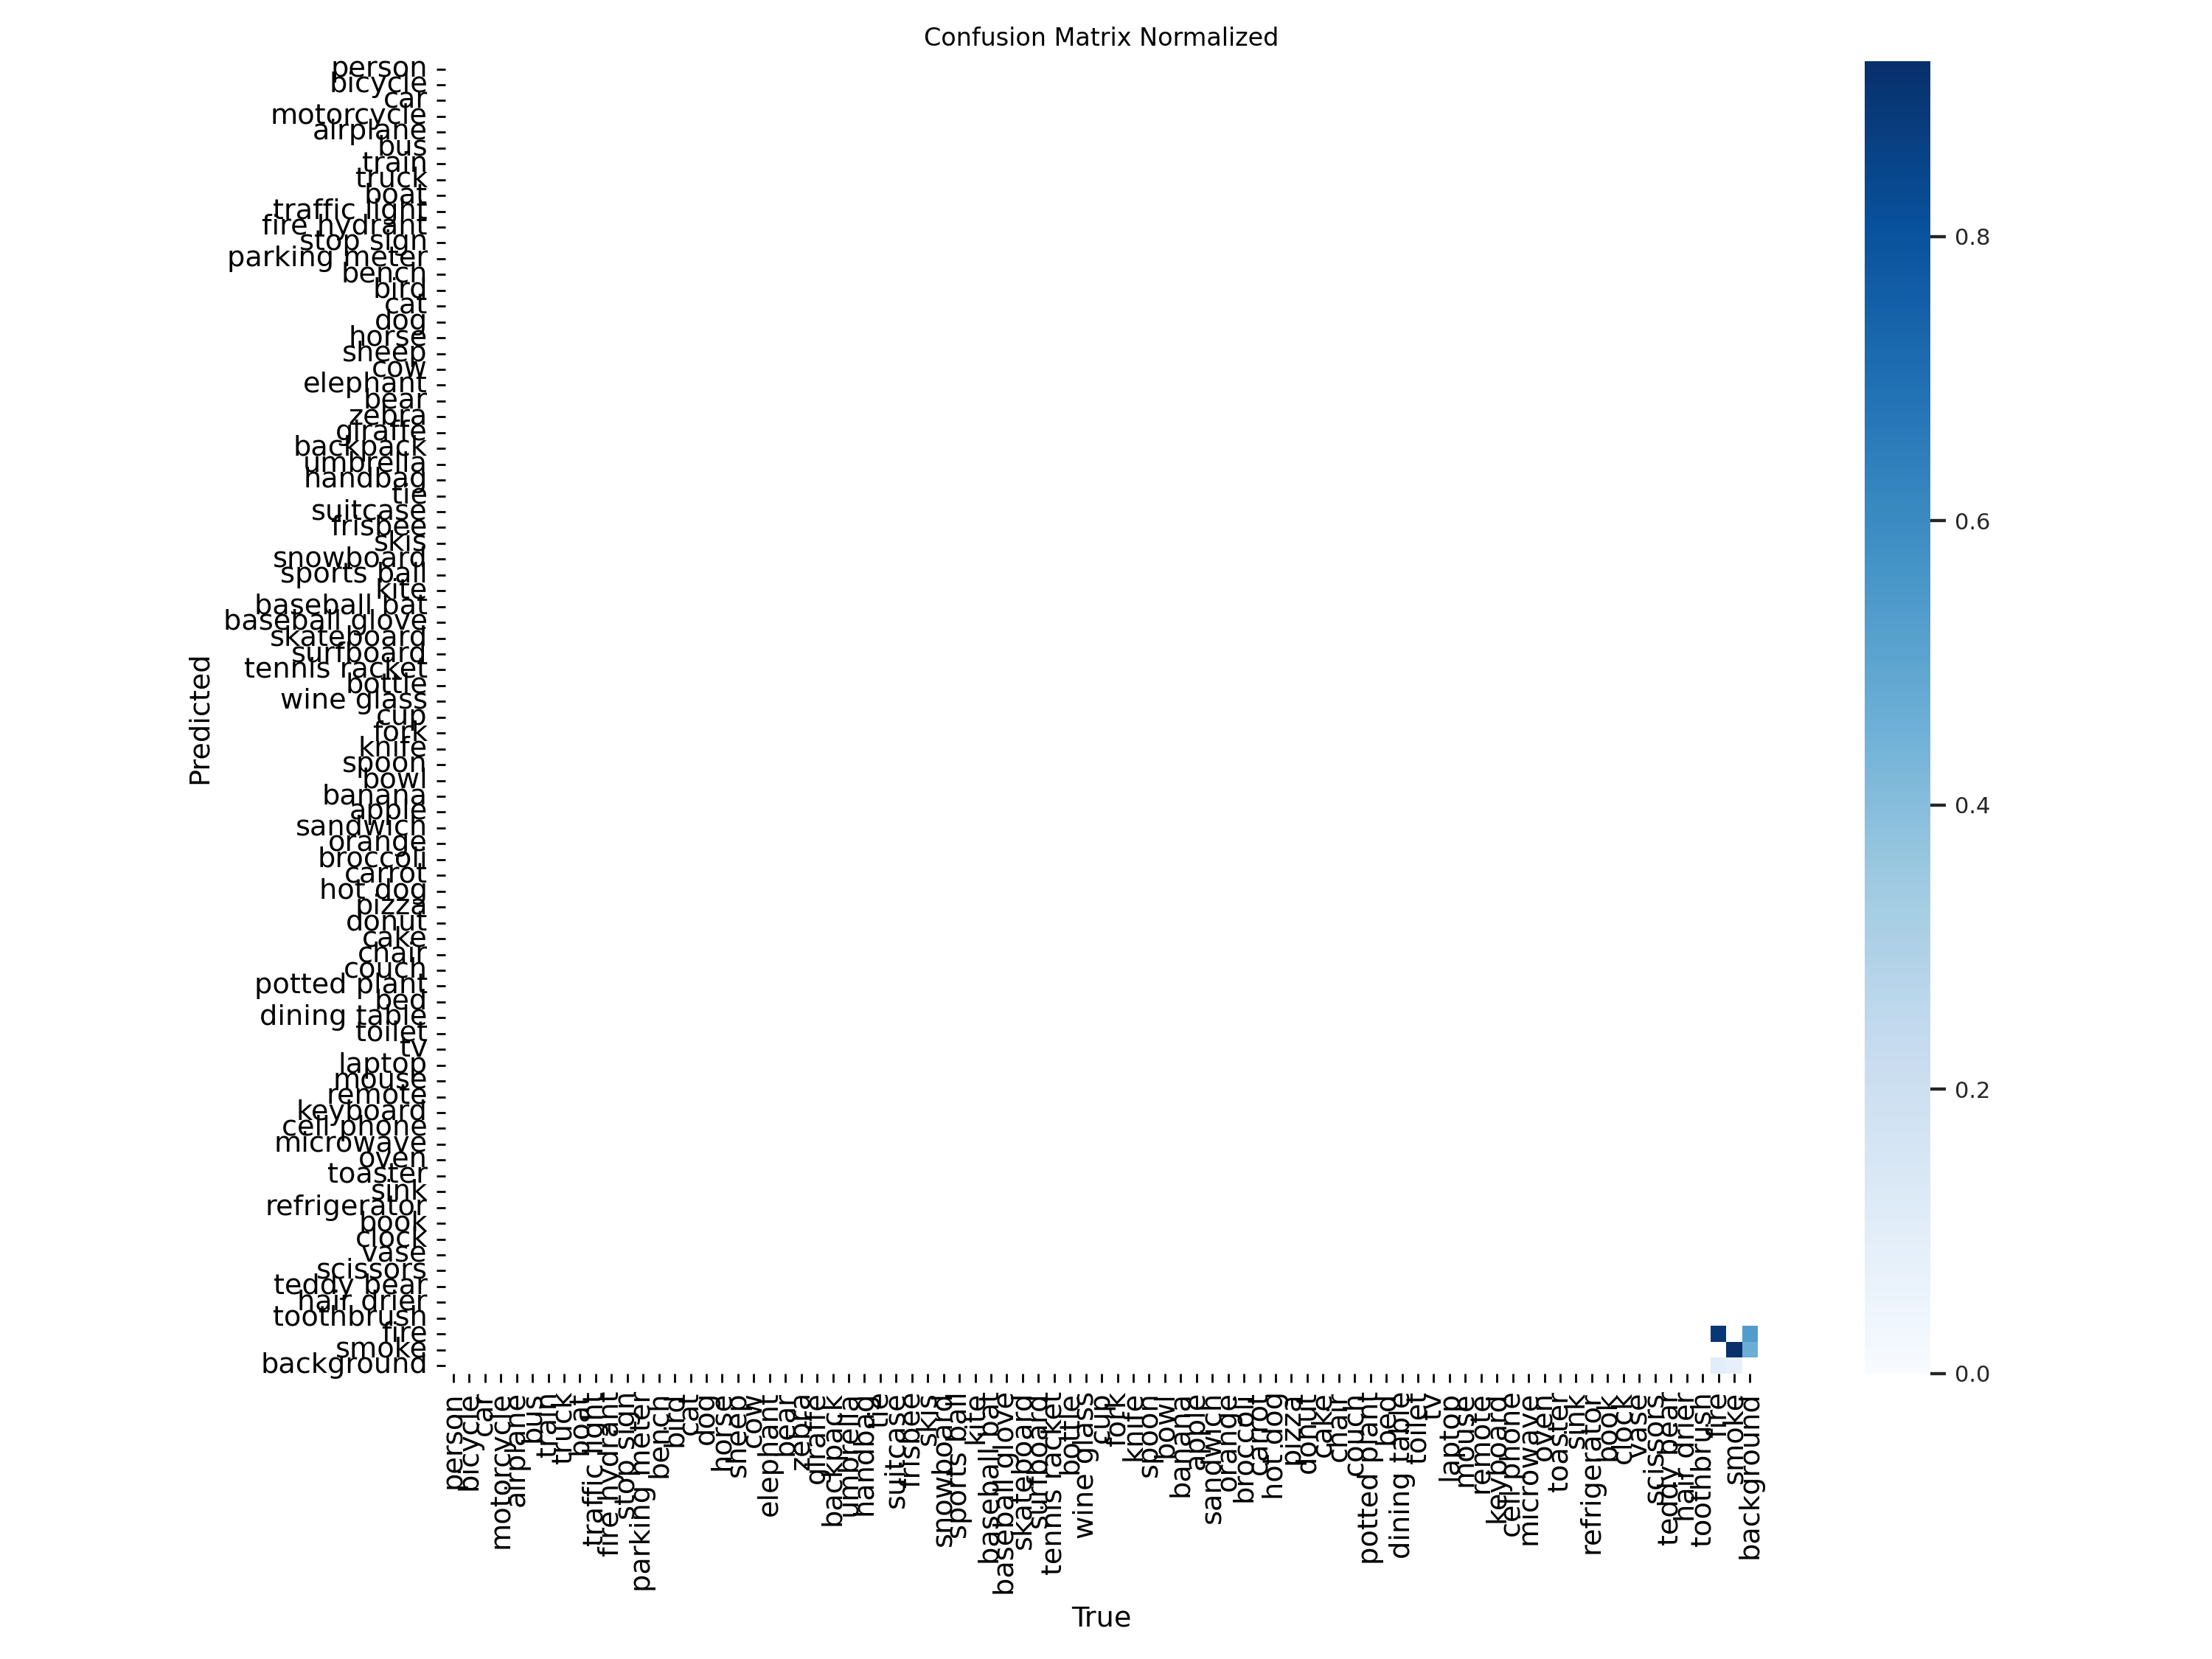

Displaying: confusion_matrix.png


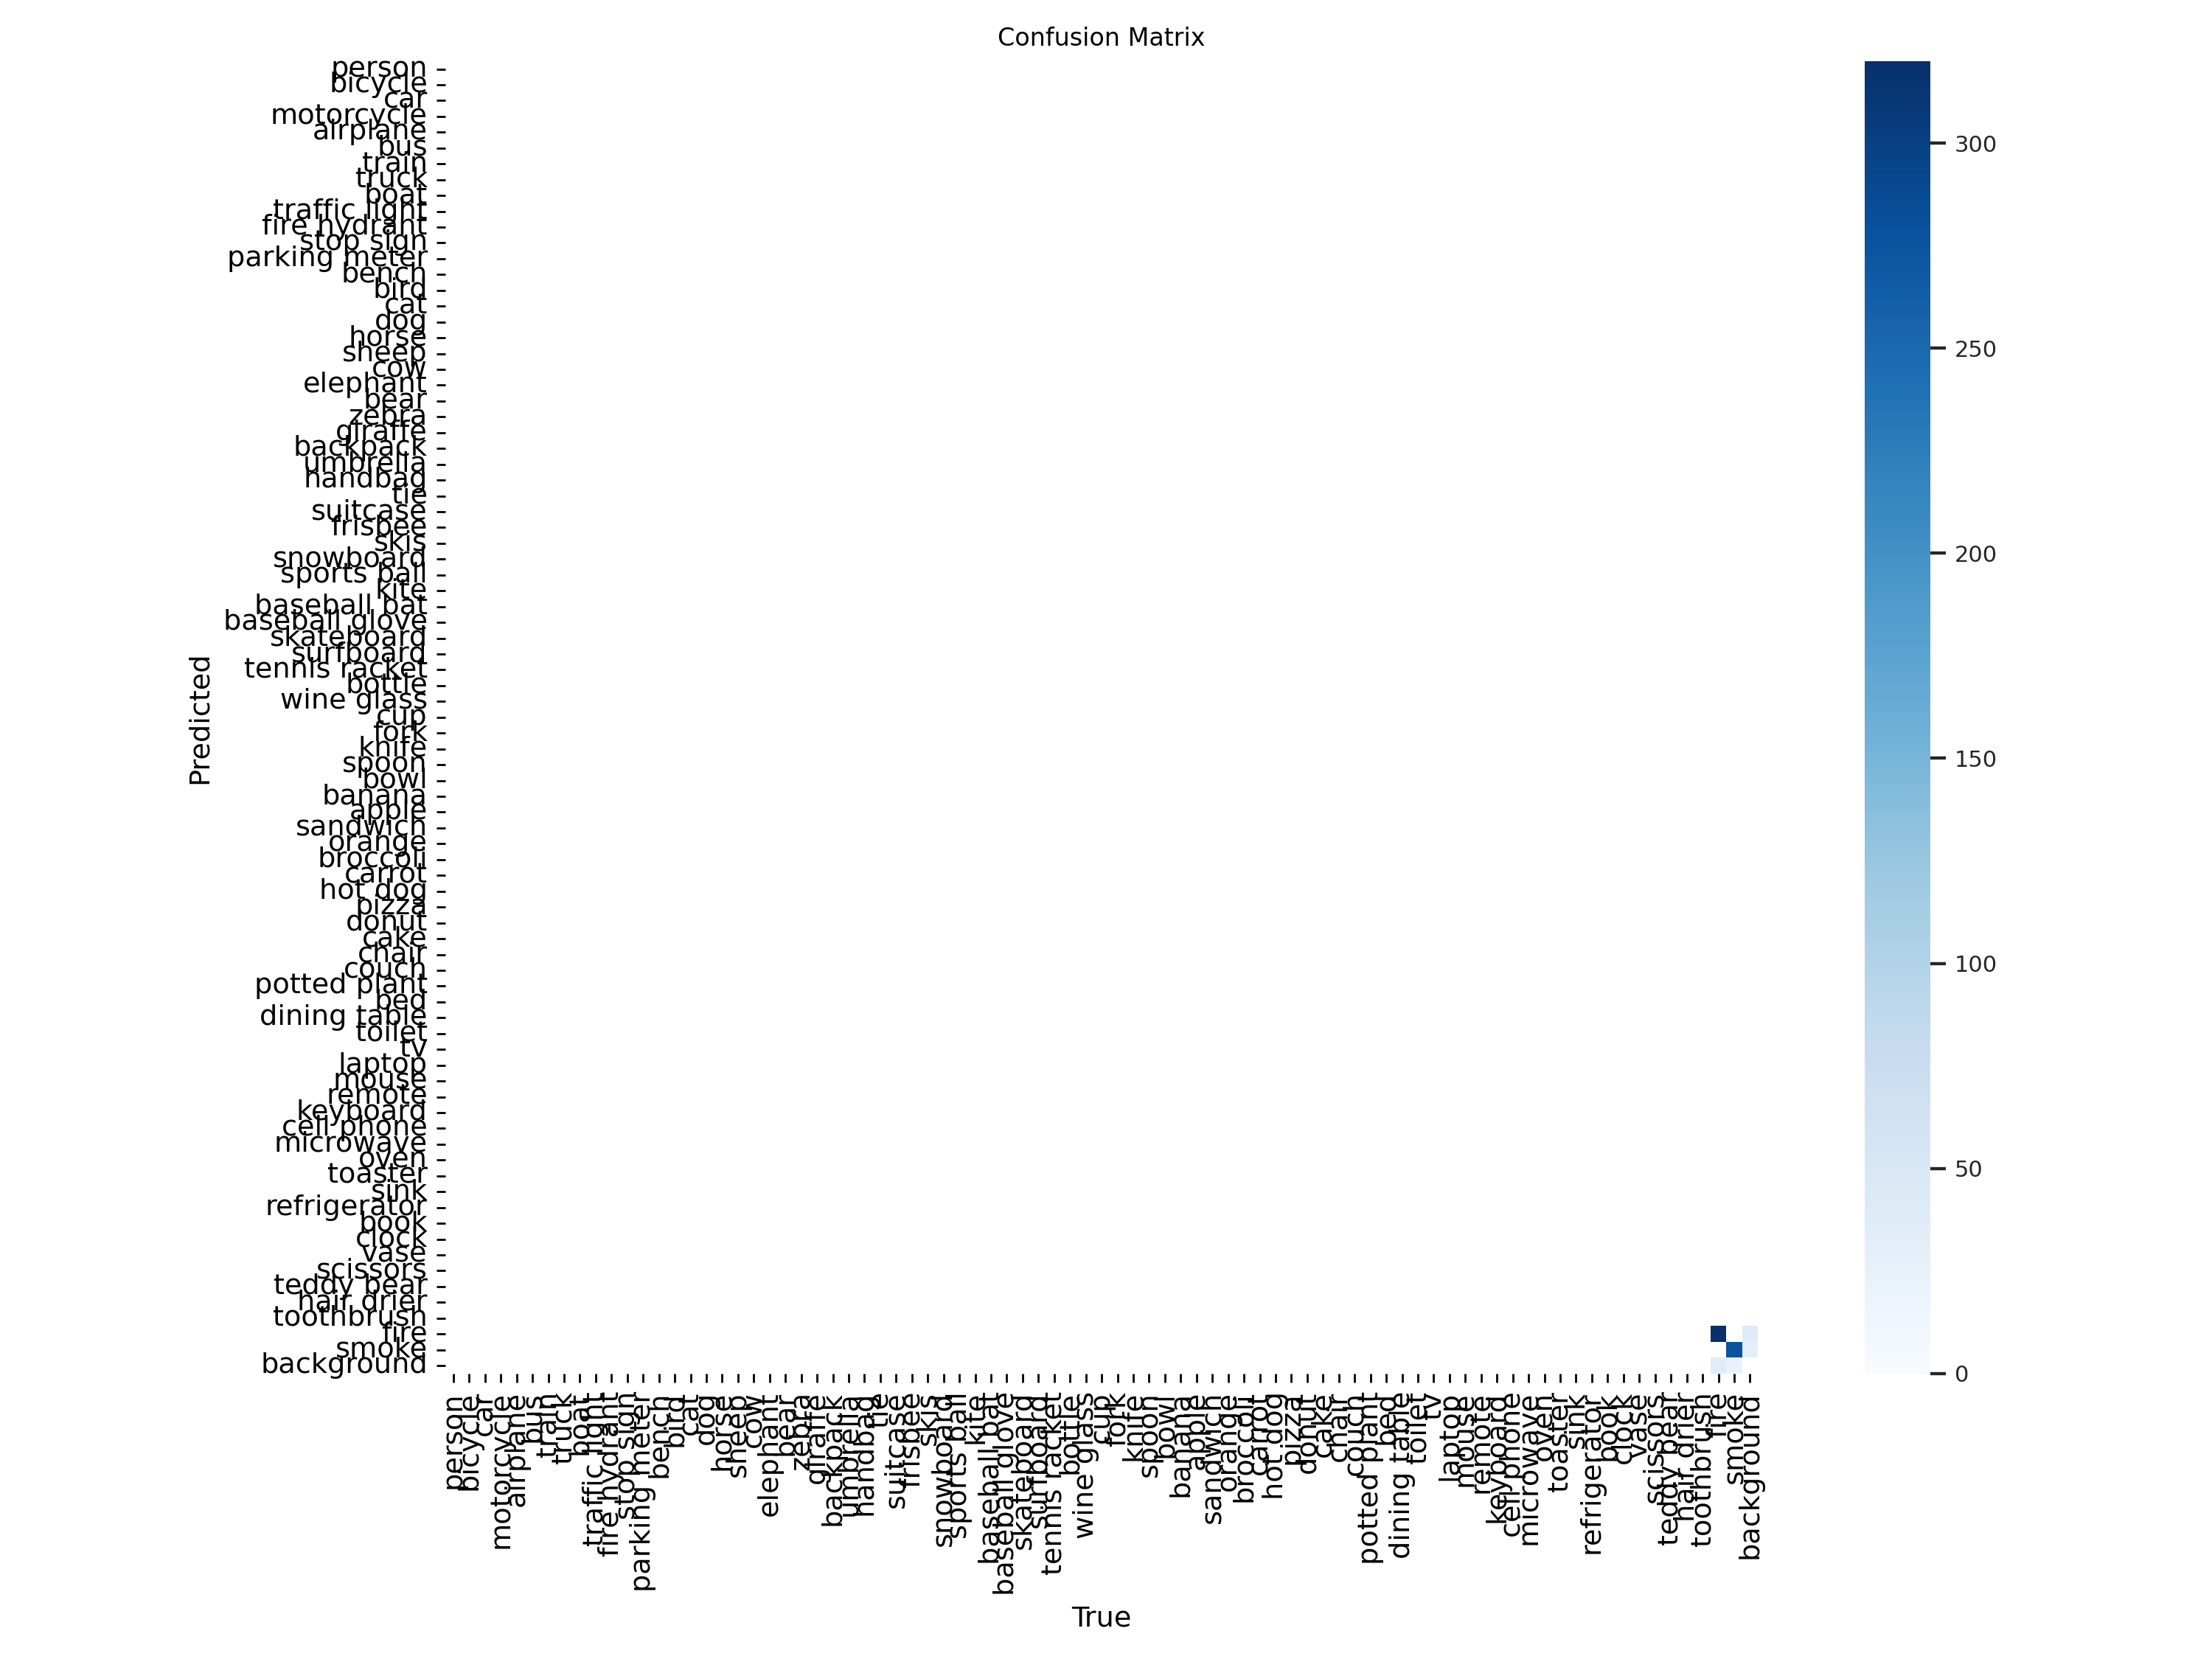

Displaying: PR_curve.png


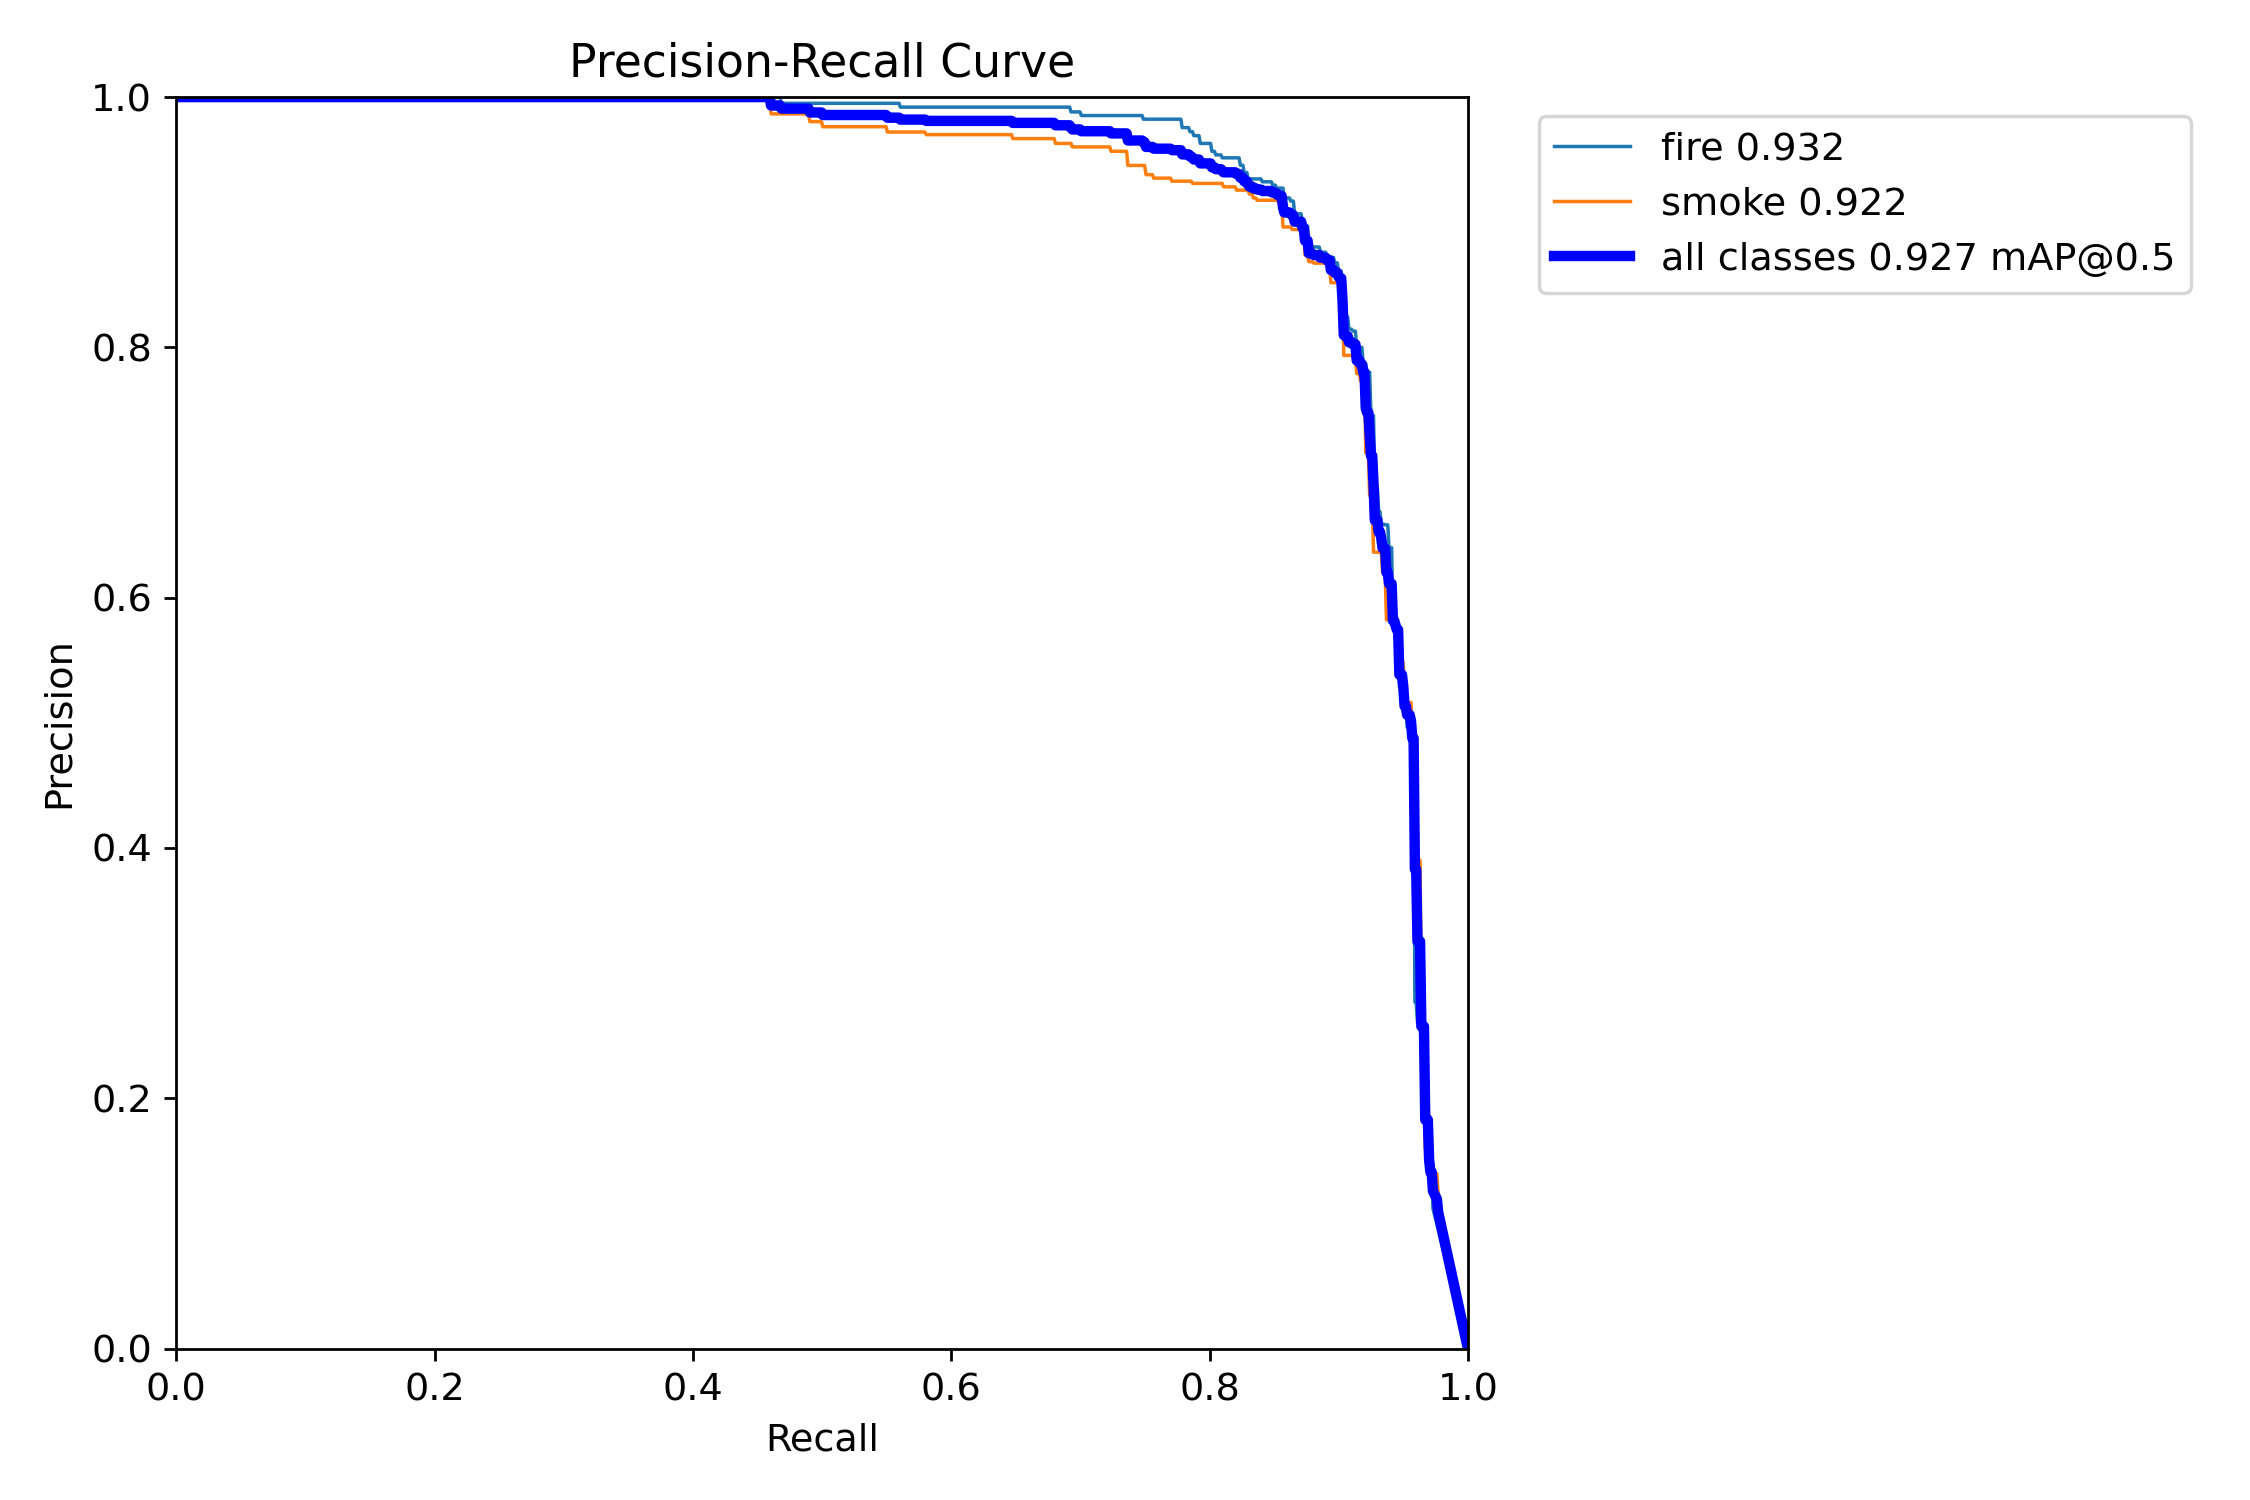

Displaying: F1_curve.png


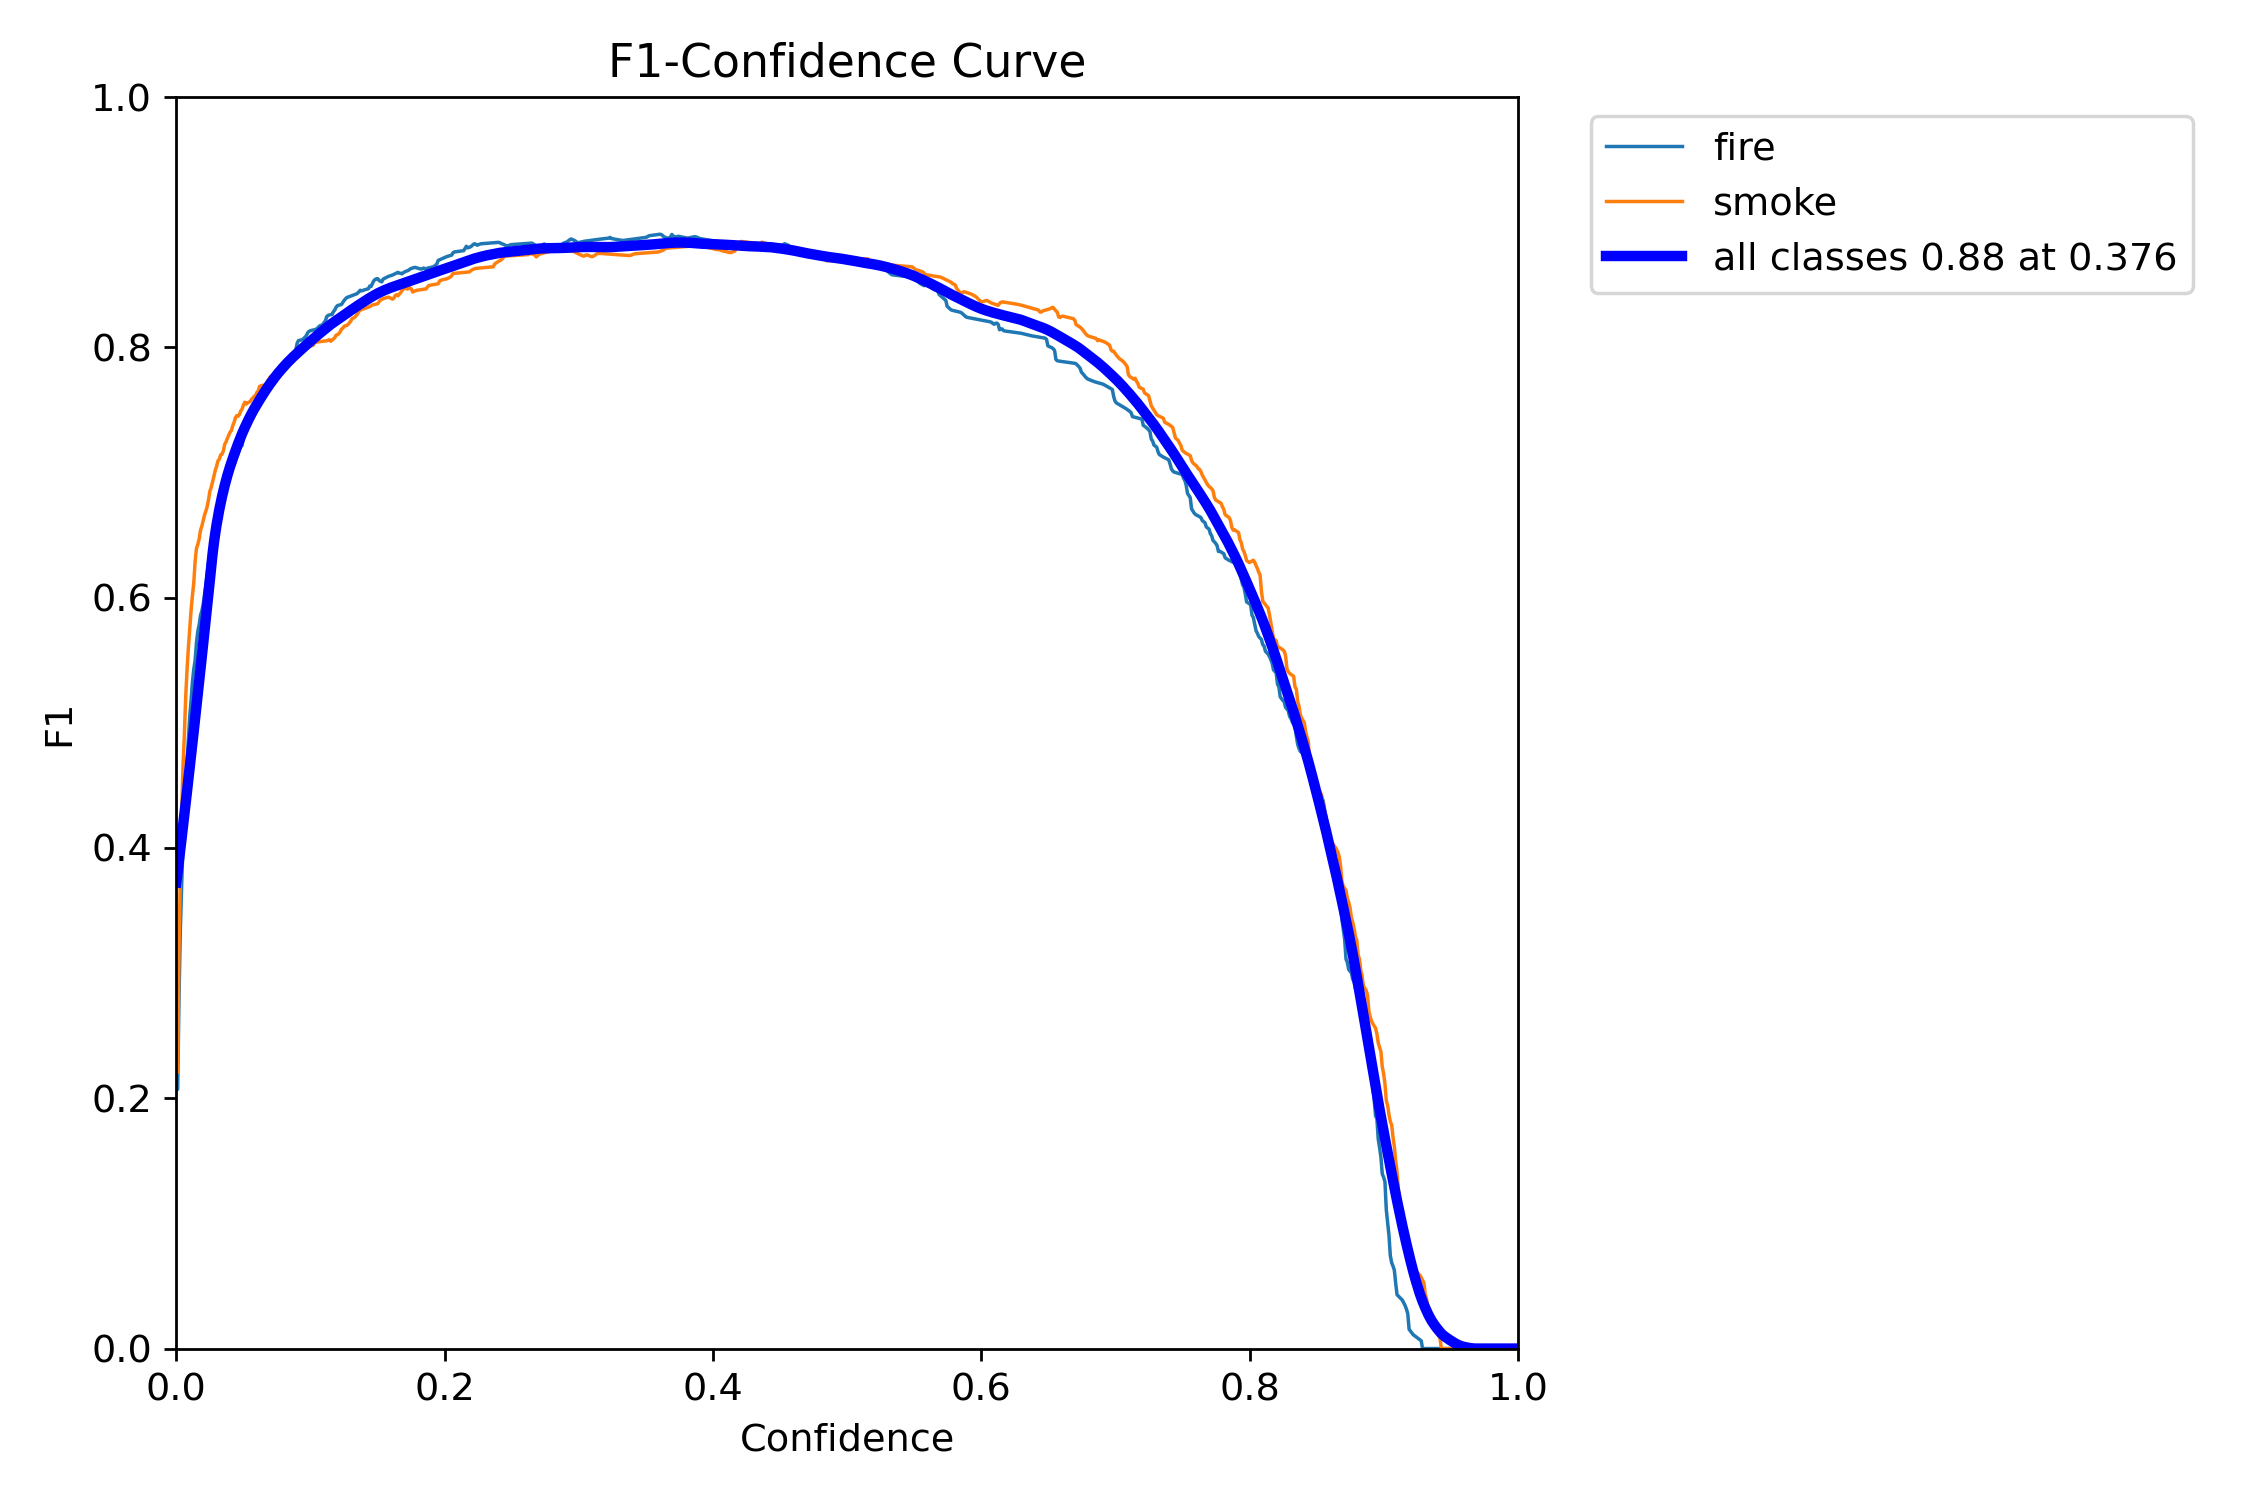

Displaying: P_curve.png


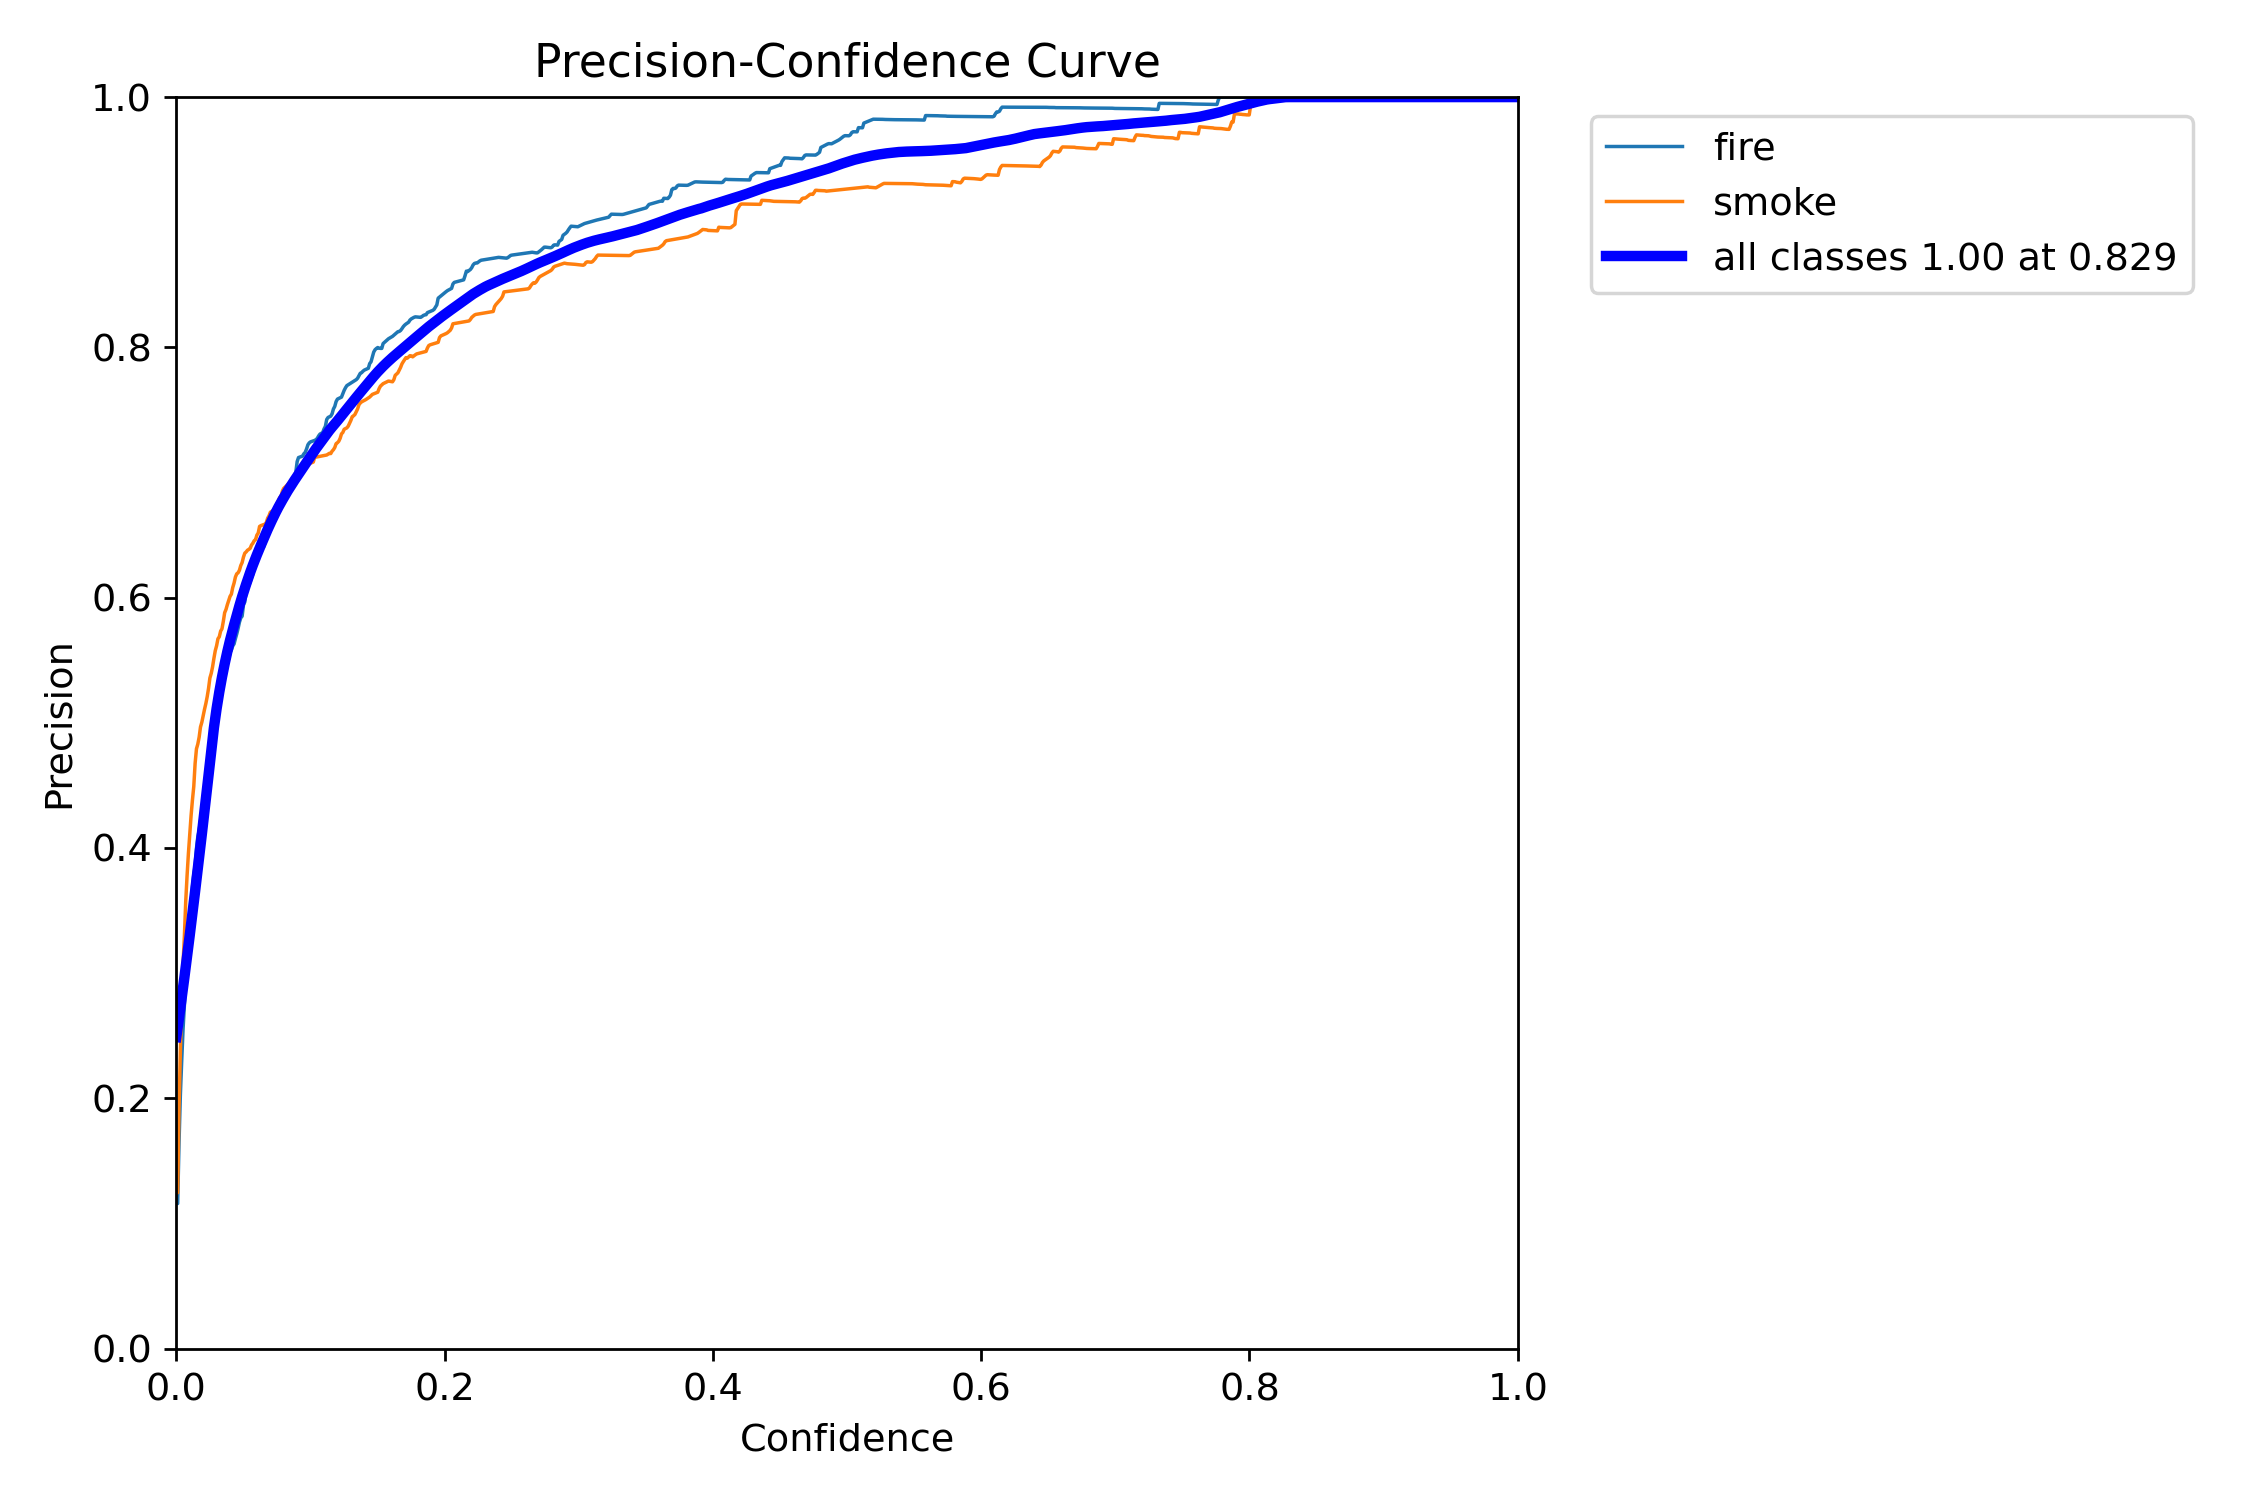

In [42]:
image_dir = '/kaggle/working/runs/detect/train2'  # Adjust path if needed

for filename in os.listdir(image_dir):
    if filename.endswith(('.png')):  # Add other image extensions if needed
        image_path = os.path.join(image_dir, filename)
        print(f"Displaying: {filename}")
        display(Image(filename=image_path))

In [36]:
!yolo task=detect mode=predict model=runs/detect/train2/weights/best.pt source=/kaggle/working/FireSmokeDetection-3/test/images

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11157318 parameters, 0 gradients, 28.6 GFLOPs

image 1/200 /kaggle/working/FireSmokeDetection-3/test/images/Img_1029_jpg.rf.8f701944928680d66dbcefebf3721ee1.jpg: 640x640 1 fire, 16.8ms
image 2/200 /kaggle/working/FireSmokeDetection-3/test/images/Img_1047_jpg.rf.1148bc422bdb75724b55b0fbae3f4979.jpg: 640x640 1 fire, 16.5ms
image 3/200 /kaggle/working/FireSmokeDetection-3/test/images/Img_1052_jpg.rf.6a6217eb4fe2c4c94a2f1024bec736d6.jpg: 640x640 1 fire, 16.5ms
image 4/200 /kaggle/working/FireSmokeDetection-3/test/images/Img_1065_jpg.rf.c6557fcb0b6cf910b3d82f412097cff0.jpg: 640x640 1 fire, 16.5ms
image 5/200 /kaggle/working/FireSmokeDetection-3/test/images/Img_1074_jpg.rf.0bbb8cd05154dae53c04a0ffb78615ce.jpg: 640x640 1 fire, 16.4ms
image 6/200 /kaggle/working/FireSmokeDetection-3/test/images/Img_107_jpg.rf.58ca7f9ccc7f269a62d593b9eec7484e.jpg: 640x640 1 fire, 16.4ms
image 7/2

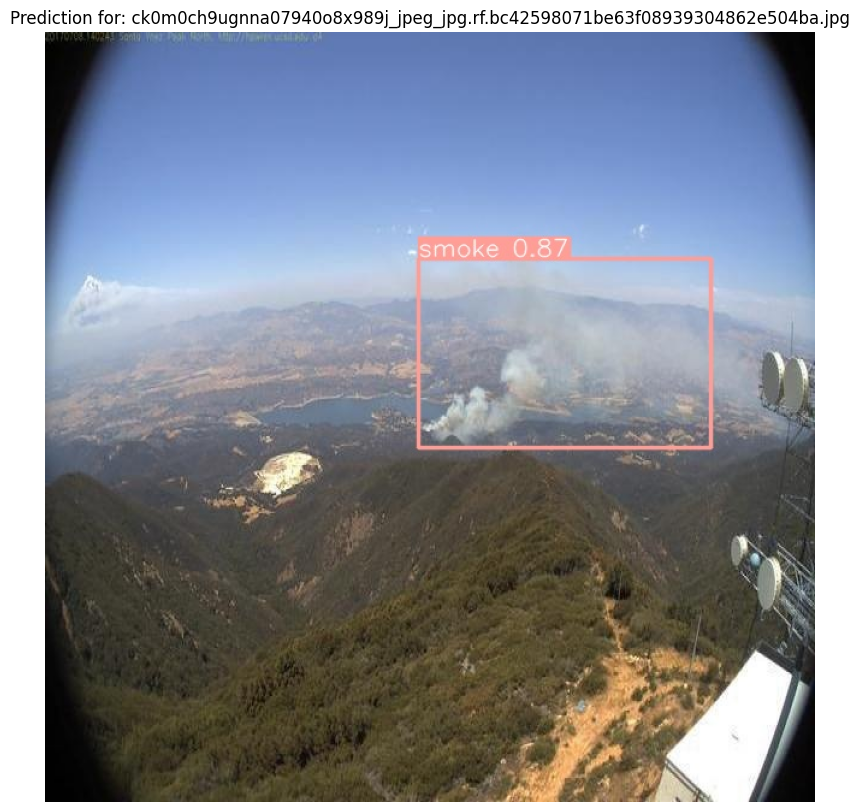

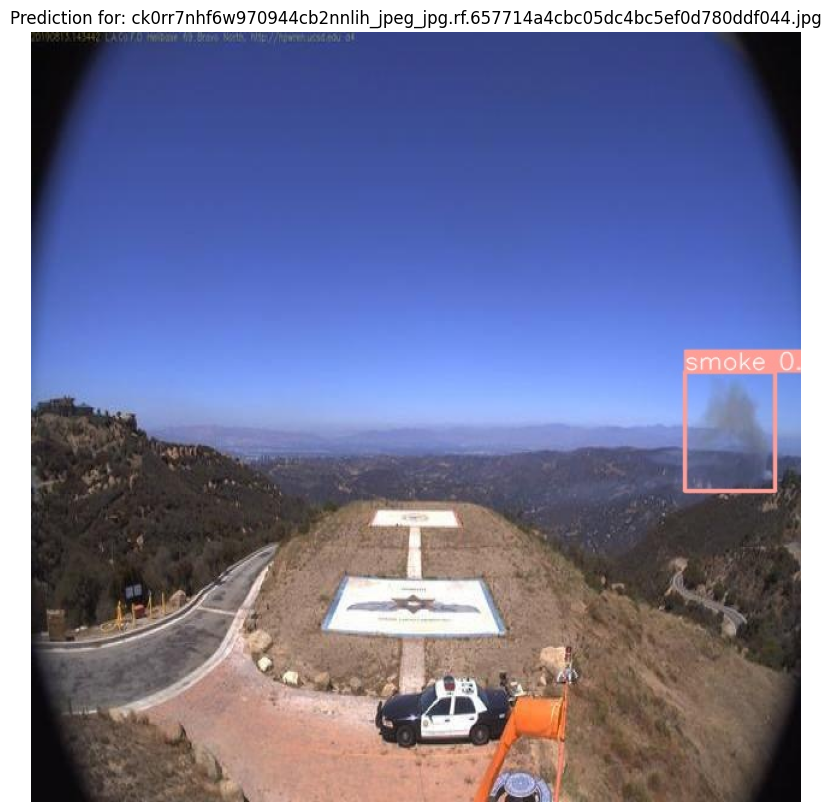

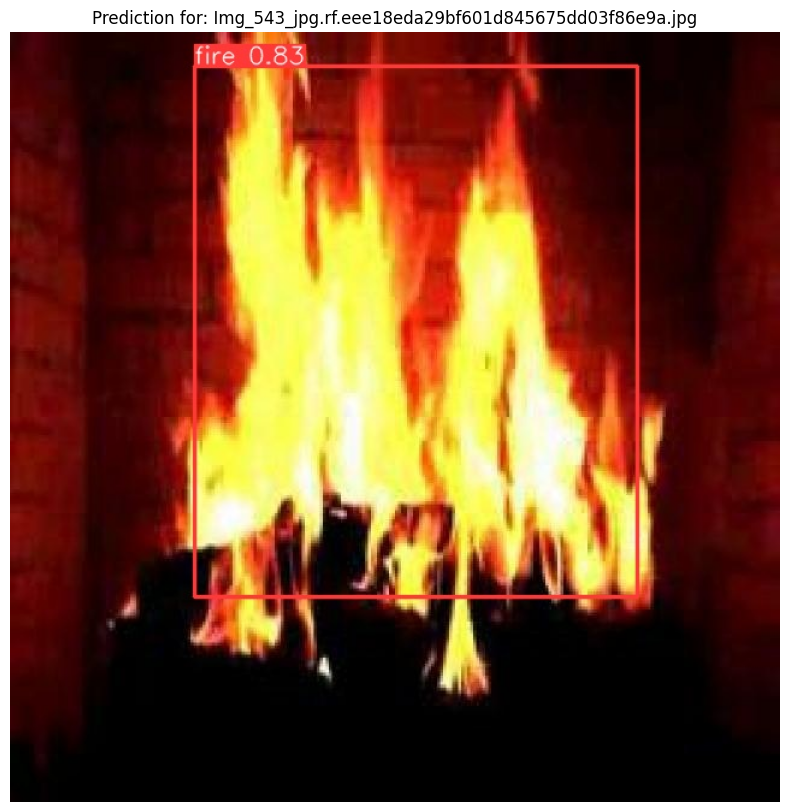

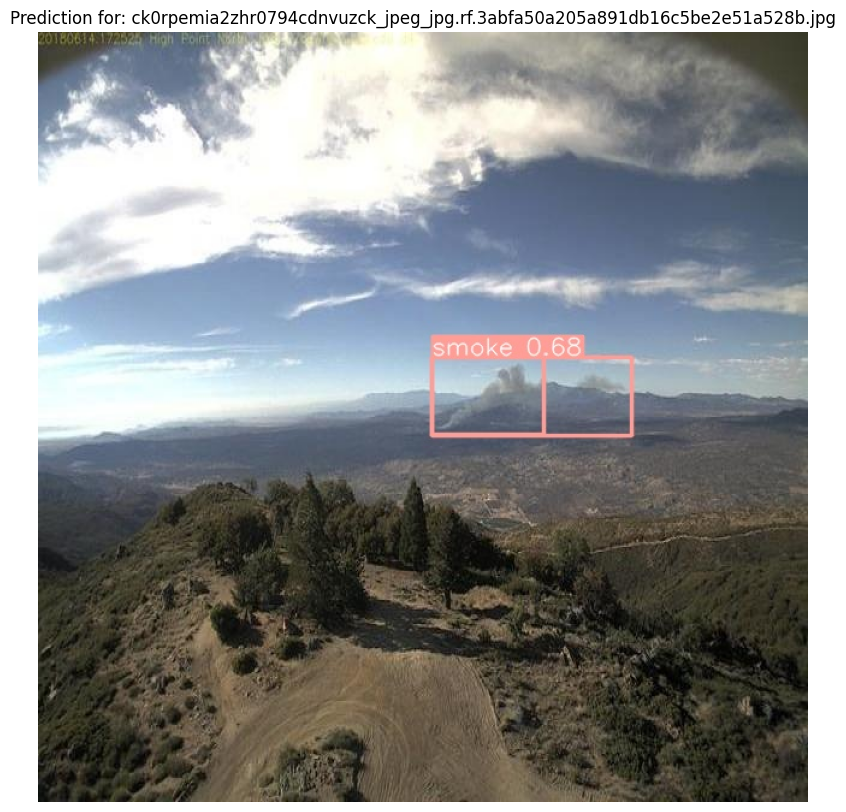

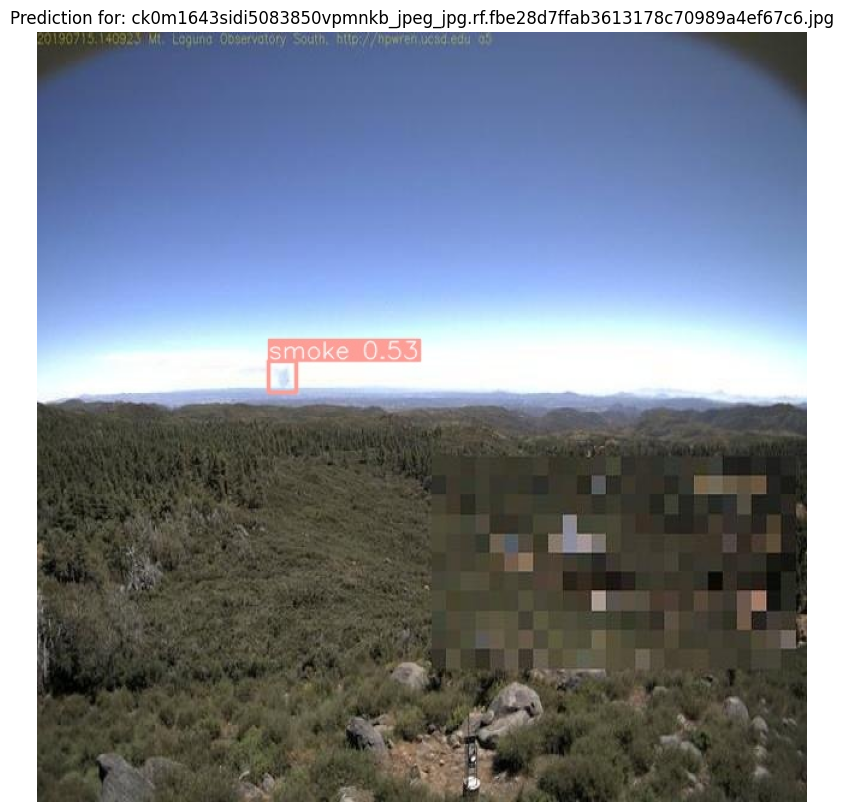

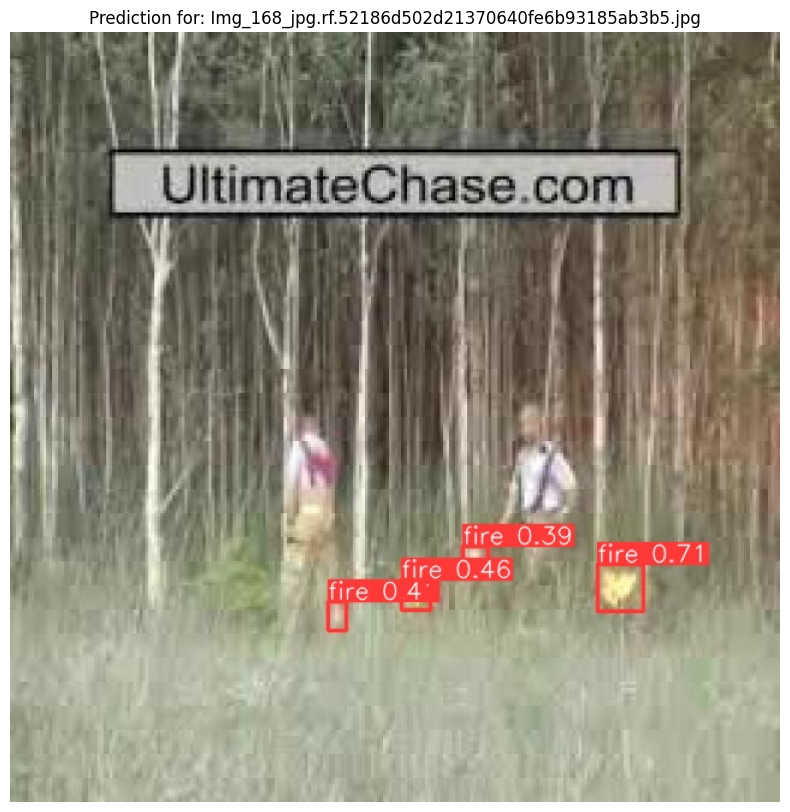

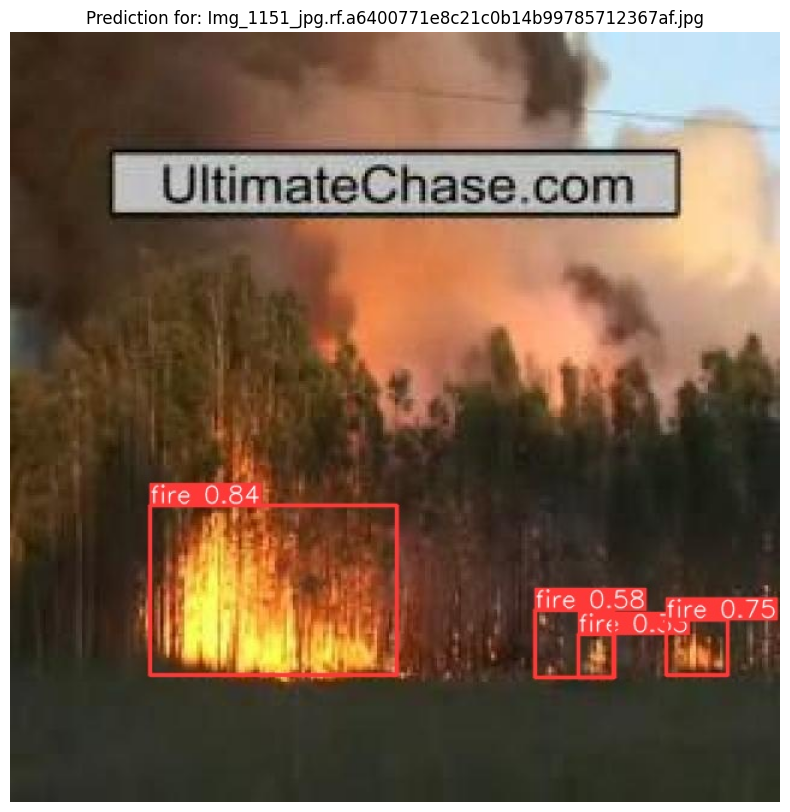

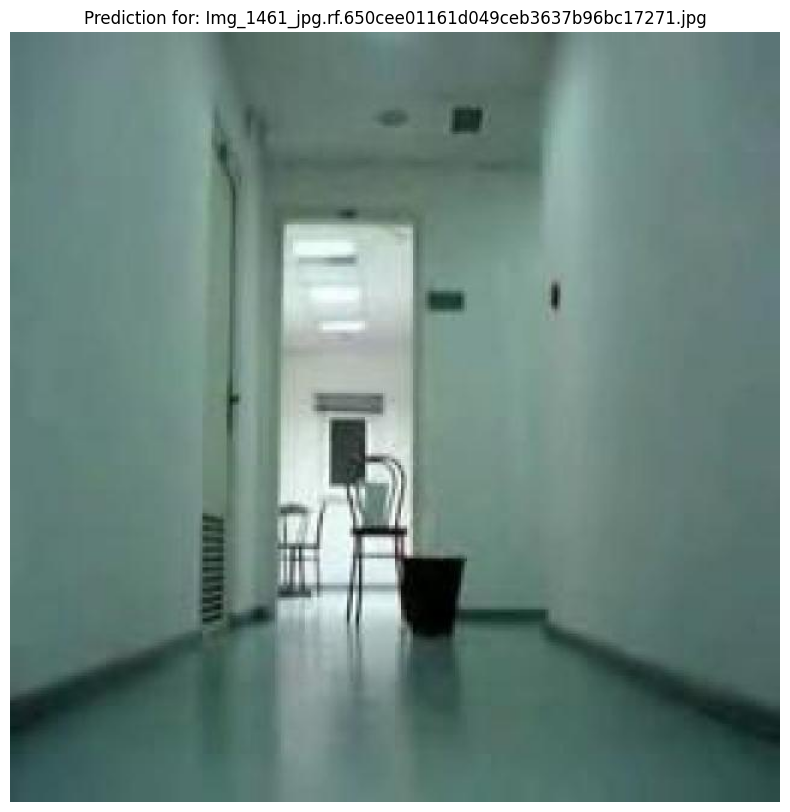

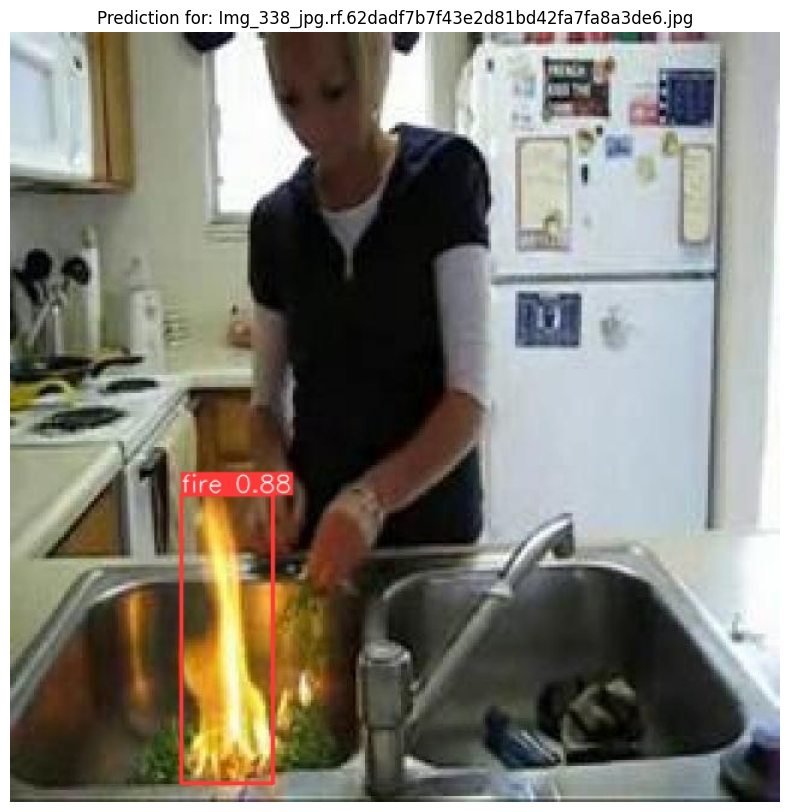

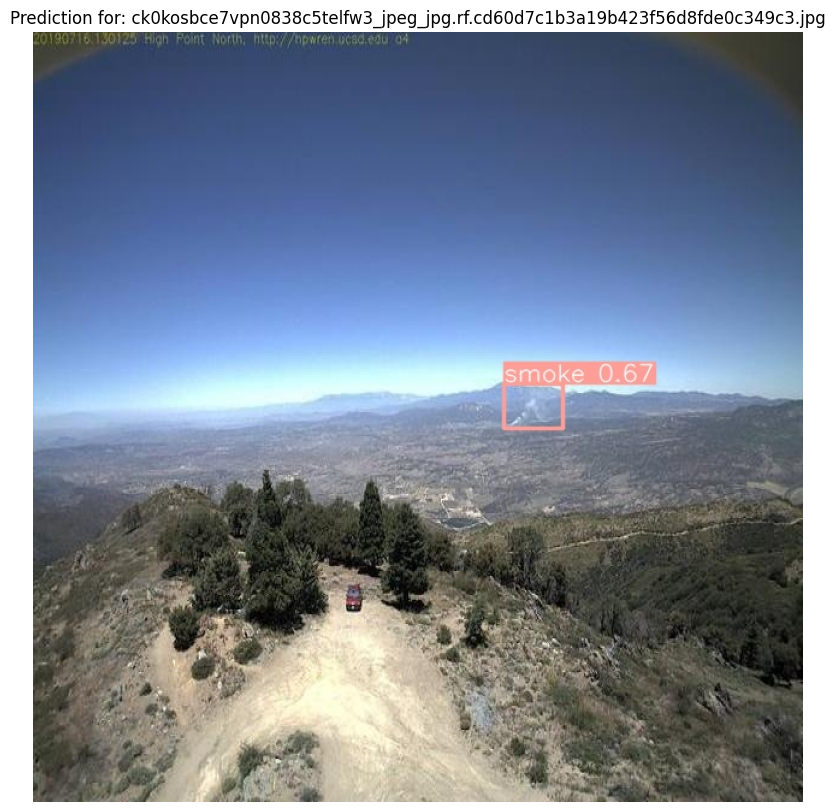

In [37]:
import matplotlib.pyplot as plt
import cv2
import os

# Path to the prediction results
prediction_dir = 'runs/detect/predict3/'

# Get all image files from the prediction directory
predicted_files = [f for f in os.listdir(prediction_dir) if f.endswith('.jpg') or f.endswith('.png')]

# Display the first few images with bounding boxes
for file_name in predicted_files[:10]:  # Display the first 5 predicted images
    img_path = os.path.join(prediction_dir, file_name)
    
    # Read the image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Plot the image
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction for: {file_name}")
    plt.show()